In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 模拟数据
np.random.seed(666) # 设置种子
x = 2 * np.random.random(size = 100) 
y = x * 3. + 4. + np.random.normal(size = 100)  # normal(size = 100)，噪音

In [3]:
X = x.reshape(-1, 1)  # 将x转化为100行1列的矩阵.这是因为我们的X是多维的

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100,)

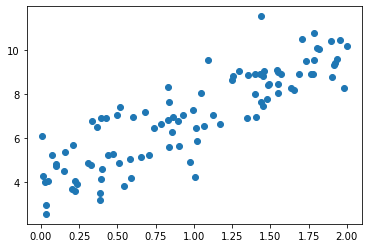

In [6]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法
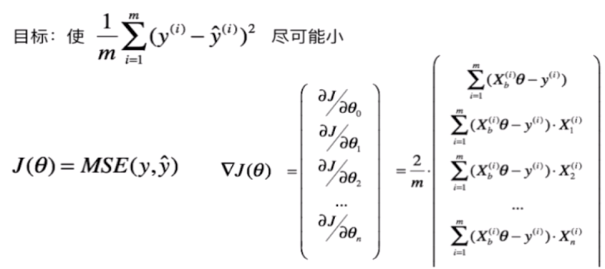

In [7]:
# 计算损失函数的值
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [8]:
# 计算J对theta求导
def dJ(theta, X_b, y):
    res = np.empty(len(theta)) # 开辟一个向量
    res[0] = np.sum(X_b.dot(theta) - y)  # 对theta_0求导
    for i in range(1, len(theta)): # 对theta_1,theta_2,...,theta_n求导
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    
    return res * 2 / len(X_b)

In [9]:
# 为了避免陷入死循环，限制了迭代次数
# n_iters,最大迭代次数
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y) # 梯度
        last_theta = theta
        theta = theta - eta * gradient
        # 应该浮点数本来就是不精确的，不要使用dJ == 0来作为判断条件
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

In [10]:
X_b = np.hstack([np.ones((len(X), 1)), X]) # 添加一列全为1的列
initial_theta = np.zeros(X_b.shape[1]) # n+1为的向量
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [11]:
theta # 可以看到是比较接近真实值的

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [12]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [13]:
lin_reg.coef_

array([3.00706277])

In [14]:
lin_reg.intercept_

4.021457858204859